In [1]:
import pandas as pd



In [3]:

df = pd.read_excel("crime_data_tn.xlsx")


In [5]:
df


,Year,Total_Crimes,Crimes_Against_Women,Theft_Robbery,Murder,Dowry_Deaths,Cyber_Crimes
0,2014,61000,8500,12000,1350,210,450
1,2015,63000,8800,13000,1400,220,520
2,2016,65500,9100,14000,1380,215,610
3,2017,67000,9500,14500,1450,225,700
4,2018,64500,9200,13500,1390,230,820
5,2019,60000,8600,12500,1300,200,950
6,2020,58000,8200,11500,1250,190,1200
7,2021,62000,8700,12500,1320,205,1400
8,2022,63500,8900,13000,1340,210,1650


In [6]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  9 non-null      int64
 1   Total_Crimes          9 non-null      int64
 2   Crimes_Against_Women  9 non-null      int64
 3   Theft_Robbery         9 non-null      int64
 4   Murder                9 non-null      int64
 5   Dowry_Deaths          9 non-null      int64
 6   Cyber_Crimes          9 non-null      int64
dtypes: int64(7)
memory usage: 636.0 bytes


Year                    0
Total_Crimes            0
Crimes_Against_Women    0
Theft_Robbery           0
Murder                  0
Dowry_Deaths            0
Cyber_Crimes            0
dtype: int64

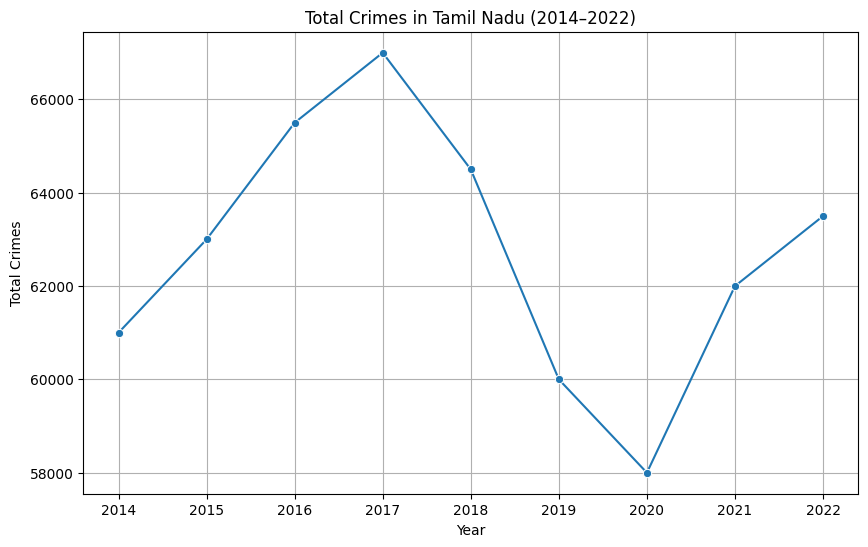

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="Total_Crimes", marker="o")
plt.title("Total Crimes in Tamil Nadu (2014–2022)")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.grid(True)
plt.show()


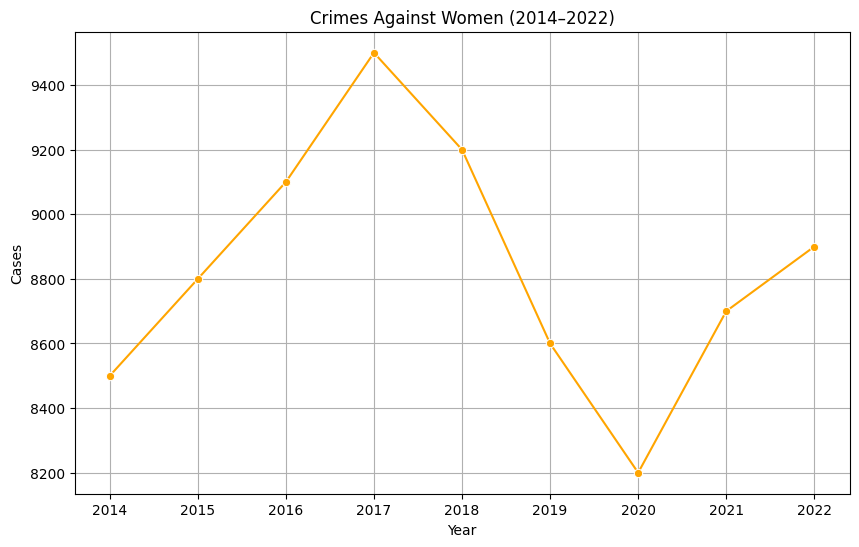

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="Crimes_Against_Women", marker="o", color='orange')
plt.title("Crimes Against Women (2014–2022)")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.grid(True)
plt.show()


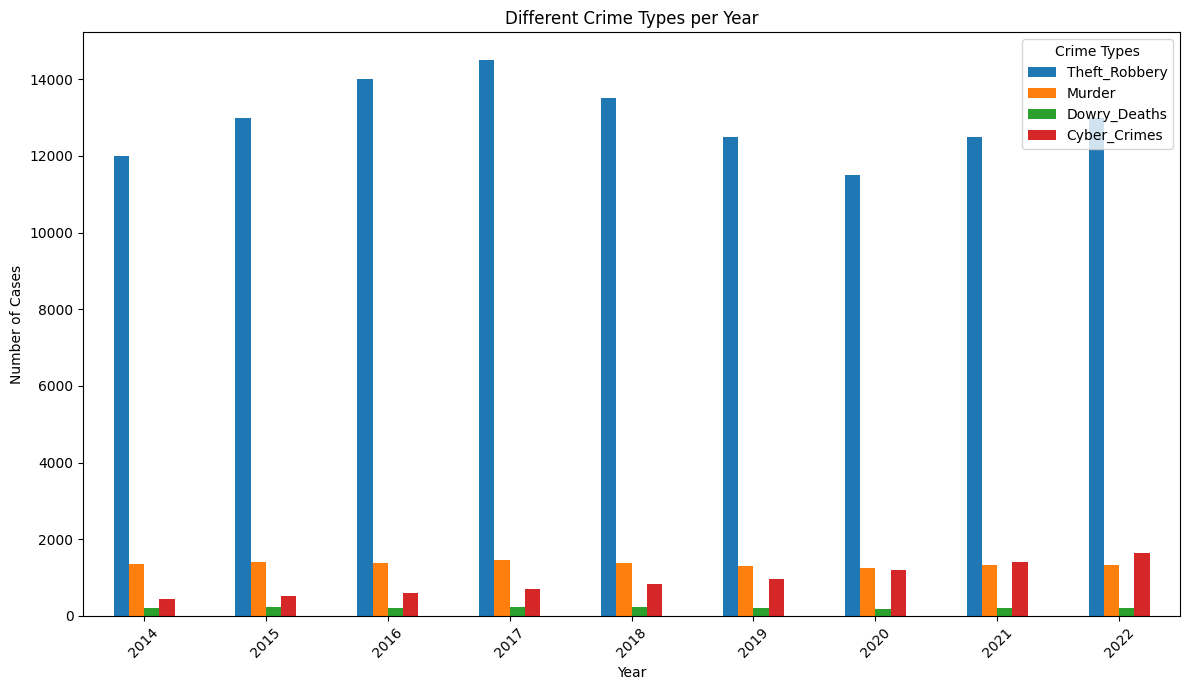

In [9]:
crime_types = ['Theft_Robbery', 'Murder', 'Dowry_Deaths', 'Cyber_Crimes']
df_plot = df[['Year'] + crime_types].set_index('Year')

df_plot.plot(kind='bar', figsize=(12, 7))
plt.title("Different Crime Types per Year")
plt.ylabel("Number of Cases")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title="Crime Types")
plt.tight_layout()
plt.show()


In [10]:
df.loc[df['Total_Crimes'].idxmax()]


Year                     2017
Total_Crimes            67000
Crimes_Against_Women     9500
Theft_Robbery           14500
Murder                   1450
Dowry_Deaths              225
Cyber_Crimes              700
Name: 3, dtype: int64

In [11]:
df['Cyber_Crimes'].pct_change() * 100


0          NaN
1    15.555556
2    17.307692
3    14.754098
4    17.142857
5    15.853659
6    26.315789
7    16.666667
8    17.857143
Name: Cyber_Crimes, dtype: float64

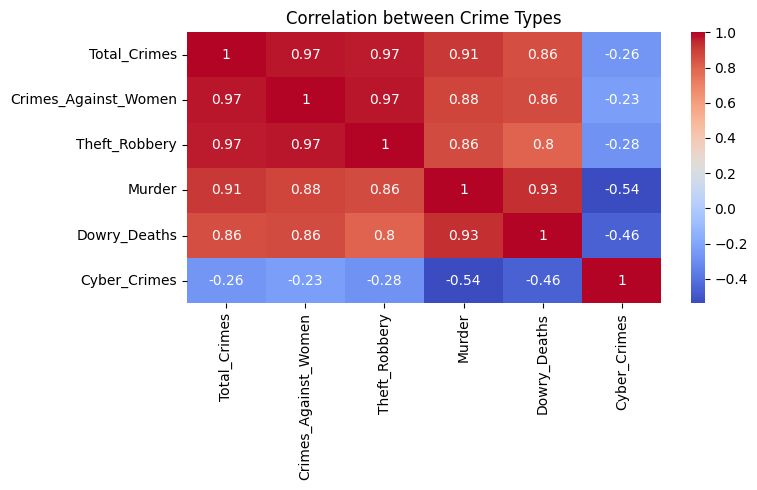

In [12]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.drop(columns=['Year']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Crime Types")
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3892\2519295256.py:6: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Program Files\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


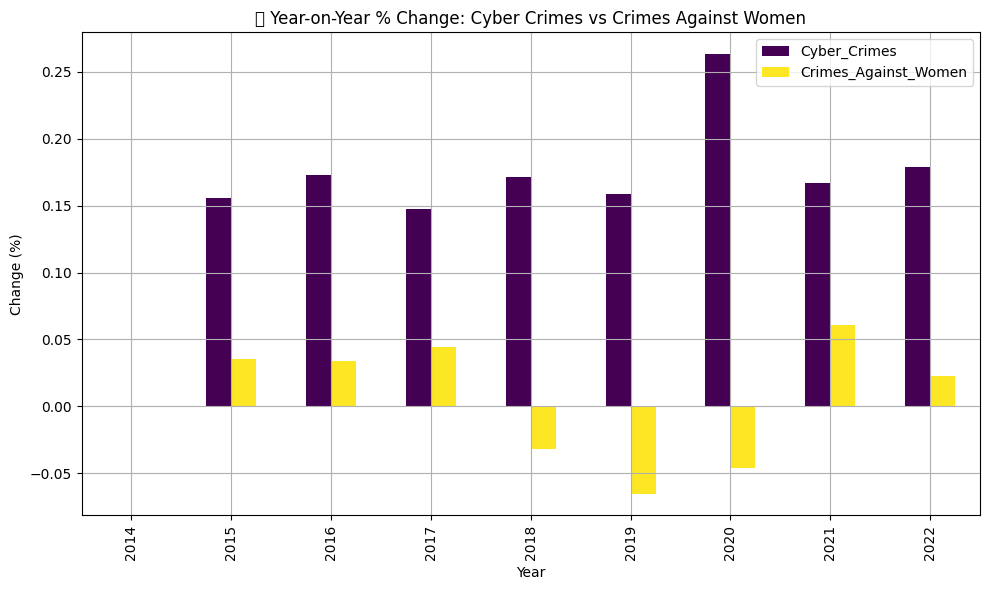

In [13]:
df_change = df.set_index('Year')[['Cyber_Crimes', 'Crimes_Against_Women']]
df_change.pct_change().plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("📈 Year-on-Year % Change: Cyber Crimes vs Crimes Against Women")
plt.ylabel("Change (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
df_long = pd.melt(df, id_vars=['Year'], 
                  value_vars=['Murder', 'Dowry_Deaths', 'Theft_Robbery', 'Crimes_Against_Women', 'Cyber_Crimes'],
                  var_name='Crime_Type', value_name='Count')
classification = {
    'Murder': 'Violent',
    'Dowry_Deaths': 'Violent',
    'Theft_Robbery': 'Property',
    'Crimes_Against_Women': 'Gender-based',
    'Cyber_Crimes': 'Digital'
}

df_long['Crime_Nature'] = df_long['Crime_Type'].map(classification)

df_long


,Year,Crime_Type,Count,Crime_Nature
0,2014,Murder,1350,Violent
1,2015,Murder,1400,Violent
2,2016,Murder,1380,Violent
3,2017,Murder,1450,Violent
4,2018,Murder,1390,Violent
5,2019,Murder,1300,Violent
6,2020,Murder,1250,Violent
7,2021,Murder,1320,Violent
8,2022,Murder,1340,Violent
9,2014,Dowry_Deaths,210,Violent


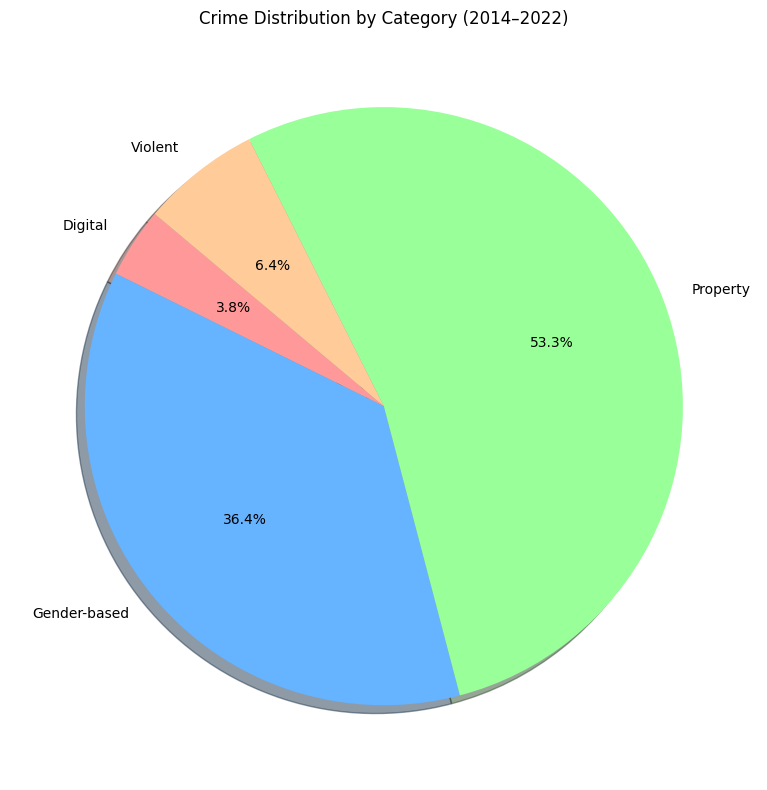

In [15]:
import matplotlib.pyplot as plt

crime_category_totals = df_long.groupby("Crime_Nature")["Count"].sum()
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
crime_category_totals.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True
)
plt.title("Crime Distribution by Category (2014–2022)")
plt.ylabel("")  
plt.tight_layout()
plt.show()
